In [1]:
import numpy as np
import corner
import GW190425_utilities as util
from GW190425_defaults import samples_dict, color_dict, label_dict

/home/carl-johan.haster/Repos/o4a-bns-target-search/plots/GW190425_utilities.py:9: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


CopyPaste from https://git.ligo.org/publications/gw190425/gw190425-discovery/-/blob/master/scripts/plot_m1m2_corner.py

In [2]:
def create_fig_and_axes(xbounds, ybounds, figsize=(9.7, 9.7)):
    fig, ax1, ax3, ax4 = util.triangle_plot_2d_axes(
        xbounds, ybounds, figsize=figsize, width_ratios=[4, 1],
        height_ratios=[1, 4], wspace=0.0, hspace=0.0)
    return fig, ax1, ax3, ax4


In [3]:
def add_samples_to_fig(xlabel, ylabel, name, zorder=1):
    x = samples_dict[name][xlabel]
    y = samples_dict[name][ylabel]
    c = color_dict[name]
    label = label_dict[name]
    alpha = alpha_dict[name]
    lw = 3
    ls = '-'
    xlow, xhigh = xlims
    ylow, yhigh = ylims

    util.bounded_kde_rescale_to_one(
        ax1, x, xlow=xlow, xhigh=xhigh, grid_low=0, grid_high=3.5, zorder=zorder,
        gridsize=2000, alpha=alpha, lw=3, linestyle='-', color=c, label=label)
    ax1.axvline(np.percentile(x, 0), lw=lw, ls=ls, color=c, zorder=zorder)
    ax1.axvline(np.percentile(x, 90), lw=lw, ls=ls, color=c, zorder=zorder)

    util.bounded_kde_rescale_to_one(
        ax4, y, xlow=ylow, xhigh=yhigh, grid_low=0, grid_high=3.5,
        gridsize=1000, alpha=alpha, lw=3, linestyle='-', color=c, label=label,
        transpose=True, zorder=zorder)
    ax4.axhline(np.percentile(y, 10), lw=lw, ls=ls, color=c, zorder=zorder)
    ax4.axhline(np.percentile(y, 100), lw=lw, ls=ls, color=c, zorder=zorder)

    range = [[xlow, xhigh], [ylow, yhigh]]
    corner.hist2d(x, y, bins=300, ax=ax3, range=range, levels=[0.9], color=c,
                  plot_datapoints=False, plot_density=True, smooth=3,
                  fill_contours=False, no_fill_contours=False,
                  contour_kwargs=dict(linestyles=[ls]))

In [4]:
alpha_dict = dict(lowspin=0.5, highspin=0.5)

# Create M1 M2 plot
xlims = [1.25, 3.0]
ylims = [0.65, 1.55]

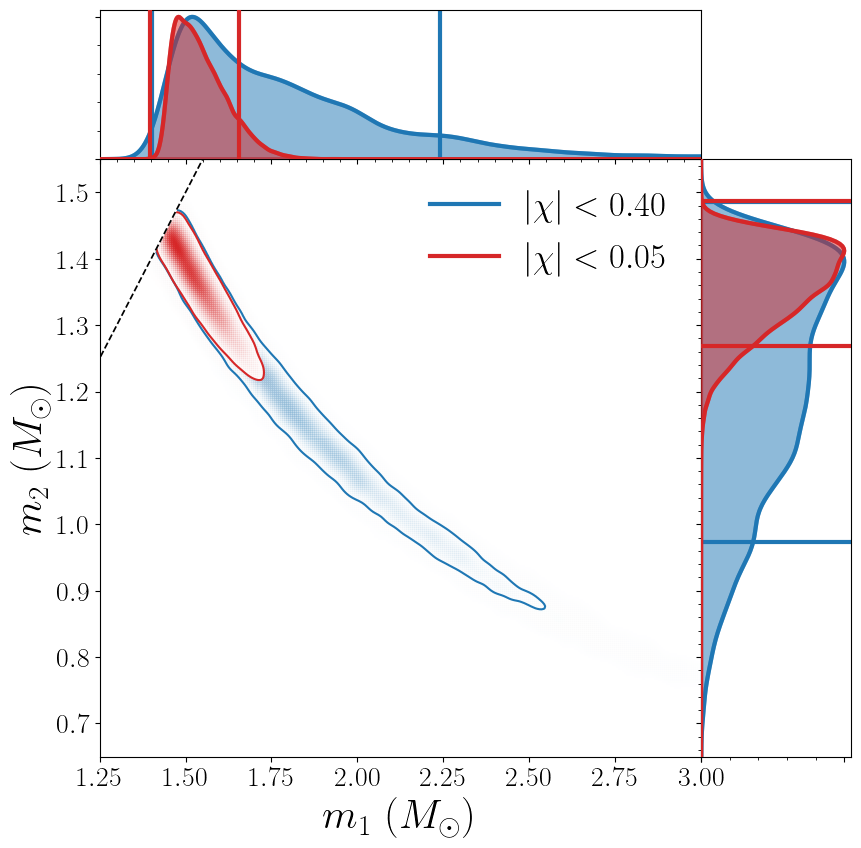

In [5]:
fig, ax1, ax3, ax4 = create_fig_and_axes(xlims, ylims)
add_samples_to_fig("mass_1_source", "mass_2_source", "highspin", zorder=-10)
add_samples_to_fig("mass_1_source", "mass_2_source", "lowspin", zorder=10)
ax3.plot([0, 10], [0, 10], ls='--', lw=1.25, c='k', zorder=130)
ax3.fill_between([1.26, 10], [1.26, 10], [10, 10.0], color='w', zorder=120)
ax1.set_yticklabels([])
ax4.set_xticklabels([])
ax3.legend(*ax1.get_legend_handles_labels(), loc='upper right', frameon=False)
ax3.set_xlabel(r'$m_1$ ($M_\odot$)')
ax3.set_ylabel(r'$m_2$ ($M_\odot$)')
fig.savefig('m1_m2.png', format='png', transparent=True, bbox_inches='tight')
#fig.savefig('m1_m2.pdf', format='pdf', transparent=True, bbox_inches='tight')
#fig.savefig('../figures/m1_m2.svg', format='svg', transparent=True, bbox_inches='tight')
